**加载相关库**

In [2]:
import warnings
warnings.filterwarnings('ignore')

import missingno as msno
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**加载数据**

In [3]:
train_path = './dataset/train.csv'
test_path = './dataset/testA.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

**探索数据**

观察数据

In [5]:
train.shape, test.shape, 

((100000, 3), (20000, 2))

In [6]:
train.head().append(train.tail())

,id,heartbeat_signals,label
0,0,"0.9912297987616655,0.9435330436439665,0.764677...",0.0
1,1,"0.9714822034884503,0.9289687459588268,0.572932...",0.0
2,2,"1.0,0.9591487564065292,0.7013782792997189,0.23...",2.0
3,3,"0.9757952826275774,0.9340884687738161,0.659636...",0.0
4,4,"0.0,0.055816398940721094,0.26129357194994196,0...",2.0
99995,99995,"1.0,0.677705342021188,0.22239242747868546,0.25...",0.0
99996,99996,"0.9268571578157265,0.9063471198026871,0.636993...",2.0
99997,99997,"0.9258351628306013,0.5873839035878395,0.633226...",3.0
99998,99998,"1.0,0.9947621698382489,0.8297017704865509,0.45...",2.0
99999,99999,"0.9259994004527861,0.916476635326053,0.4042900...",0.0


In [8]:
test.head().append(test.tail())

,id,heartbeat_signals
0,100000,"0.9915713654170097,1.0,0.6318163407681274,0.13..."
1,100001,"0.6075533139615096,0.5417083883163654,0.340694..."
2,100002,"0.9752726292239277,0.6710965234906665,0.686758..."
3,100003,"0.9956348033996116,0.9170249621481004,0.521096..."
4,100004,"1.0,0.8879490481178918,0.745564725322326,0.531..."
19995,119995,"1.0,0.8330283177934747,0.6340472606311671,0.63..."
19996,119996,"1.0,0.8259705825857048,0.4521053488322387,0.08..."
19997,119997,"0.951744840752379,0.9162611283848351,0.6675251..."
19998,119998,"0.9276692903808186,0.6771898159607004,0.242906..."
19999,119999,"0.6653212231837624,0.527064114047737,0.5166625..."


总览数据概况

In [11]:
train.describe()  # 相关统计信息

,id,label
count,100000.000000,100000.000000
mean,49999.500000,0.856960
std,28867.657797,1.217084
min,0.000000,0.000000
25%,24999.750000,0.000000
50%,49999.500000,0.000000
75%,74999.250000,2.000000
max,99999.000000,3.000000


In [13]:
train.info()  # 数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   heartbeat_signals  100000 non-null  object 
 2   label              100000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


判断数据缺失和异常

In [15]:
train.isnull().sum()  # 查看每列的存在nan的情况

id                   0
heartbeat_signals    0
label                0
dtype: int64

了解预测值的分布

In [16]:
train.label

0        0.0
1        0.0
2        2.0
3        0.0
4        2.0
        ... 
99995    0.0
99996    2.0
99997    3.0
99998    2.0
99999    0.0
Name: label, Length: 100000, dtype: float64

In [17]:
train.label.value_counts()

0.0    64327
3.0    17912
2.0    14199
1.0     3562
Name: label, dtype: int64

总体分布概况

In [29]:
import scipy.stats as st

In [30]:
y = train.label

<AxesSubplot:title={'center':'Log Normal'}, xlabel='label'>

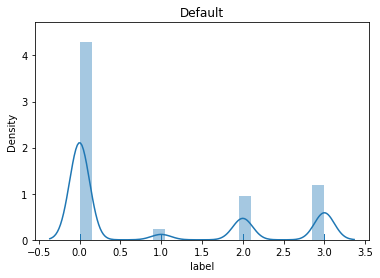

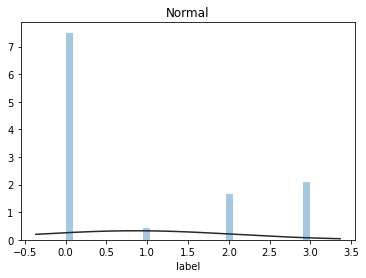

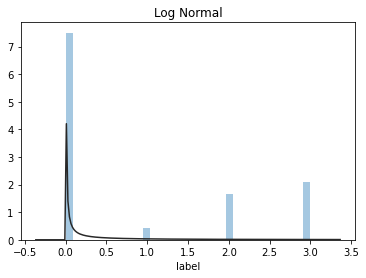

In [32]:
# rug 是否在横轴上绘制观测值竖线
plt.figure(1)
plt.title('Default')
sns.distplot(y, rug=True, bins=20)

# kde, 是否绘制高斯核密度估计图
# fit, 一个带有fit方法的对象
plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)


plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Skewness: 0.871005
Kurtosis: -1.009573


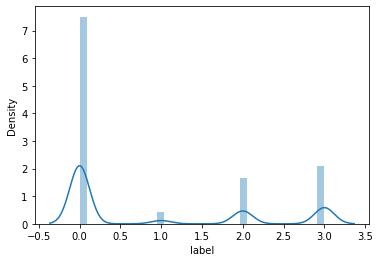

In [36]:
# 查看skewness, kurtosis
# skewness: 偏度, 是统计数据分布偏斜方向和程度的度量
# kurtosis: 峰度, 表征概率密度分布曲线在平均值处峰值高低的特征数。
#           直观看来，峰度反映了峰部的尖度。
sns.distplot(train['label']);
print("Skewness: %f" % train['label'].skew())
print("Kurtosis: %f" % train['label'].kurt())

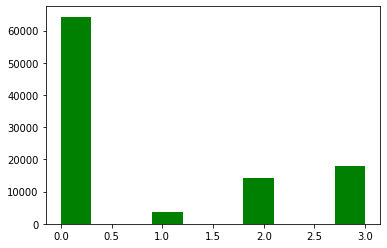

In [38]:
# 查看预测值的具体频数
plt.hist(train['label'], orientation = 'vertical', histtype = 'bar', color ='green')
plt.show()